In [1]:
import sympy as sp

sp.init_printing()

In [2]:
t = sp.symbols("t")
X = sp.Function("X")
Y = sp.Function("Y")
Z = sp.Function("Z")

# Define camera properties
csi = sp.symbols("xi")
psi = sp.symbols("psi") 

# Auxiliary variables
alpha = sp.symbols("alpha")
rho = sp.sqrt(X(t) ** 2 + Y(t) ** 2 + Z(t) ** 2)
r = sp.symbols("rho")

# Define xs and y
x = X(t)/(Z(t) + csi * rho)
y = Y(t)/(Z(t) + csi * rho)

# Define Ji
Ji_0 = sp.diff(x, X(t))
Ji_1 = sp.diff(x, Y(t))
Ji_2 = sp.diff(x, Z(t))
Ji_3 = sp.diff(y, X(t))
Ji_4 = sp.diff(y, Y(t))
Ji_5 = sp.diff(y, Z(t))

Ji = sp.Matrix([[Ji_0, Ji_1, Ji_2],
               [Ji_3, Ji_4, Ji_5]])
Ji_s = Ji * (rho * (Z(t) + csi * rho)**2 )

In [3]:
Jm = sp.Matrix([[0, -Z(t), Y(t), -1, 0, 0], 
                [Z(t), 0, -X(t), 0, -1, 0], 
                [-Y(t), X(t), 0, 0, 0, -1]])
Jg = Ji @ Jm

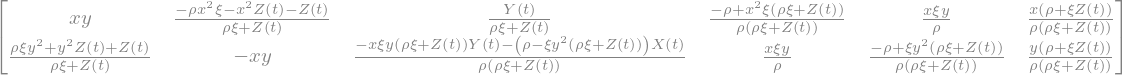

In [4]:
# Try symbolic simplification of x and y given their values
xs = sp.symbols("x")
ys = sp.symbols("y")
alpha = sp.symbols("alpha")
r = sp.symbols("rho")

# Substitute for expressions
Jg_s = Jg.subs({x: xs, y: ys, rho: r})
Jg_s = sp.simplify(Jg_s)
Jg_n = Jg_s.subs({x: xs, y: ys, rho: r})
sp.simplify(Jg_n)

In [5]:
Jg_numeric = sp.simplify(Jg.subs({X(t): 1, Y(t): 2, Z(t): -3, csi: 0.0})).evalf()

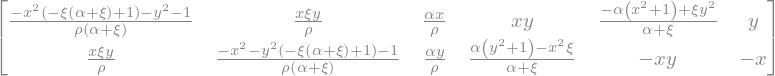

In [6]:
# Implement ground truth expression from Carons's paper and subtract it to my solution: result needs to be zero
ups = sp.symbols("alpha")

# Matrix entries
l11 = -(1 + xs**2 * (1 - csi * (ups + csi)) + ys**2) / (r * (ups + csi))
l12 = xs * ys * csi / r
l13 = xs * ups / r
l14 = xs * ys
l15 = -((1 + xs**2) * ups - ys**2 * csi) / (ups + csi)
l16 = ys

l21 = xs * ys * csi / r
l22 = -(1 + xs**2 + ys**2 * (1 - csi * (ups + csi))) / (r * (ups + csi))
l23 = ys * ups / r
l24 = ((1 + ys**2) * ups - xs**2 * csi) / (ups + csi)
l25 = -xs * ys
l26 = -xs

caron_L = sp.Matrix([[l11, l12, l13, l14, l15, l16], [l21, l22, l23, l24, l25, l26]])

caron_L

In [7]:
# Substitute with numerics
xs_value = x.subs({X(t): 1, Y(t): 2, Z(t): -3, csi: 0.0})
ys_value = y.subs({X(t): 1, Y(t): 2, Z(t): -3, csi: 0.0})
alp = sp.sqrt(1 + (x**2 + y**2) * (1 - csi**2))
ups_value = alp.subs({X(t): 1, Y(t): 2, Z(t): -3, csi: 0.0})
r_value = rho.subs({X(t): 1, Y(t): 2, Z(t): -3, csi: 0.0})
BL_num = caron_L.subs({xs: xs_value, ys: ys_value, ups: ups_value, r: r_value, csi: 0.0})

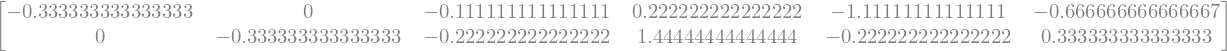

In [8]:
BL_num.evalf()

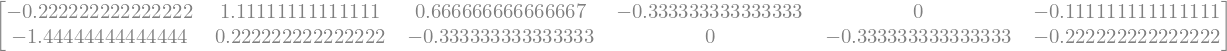

In [9]:
-Jg_numeric